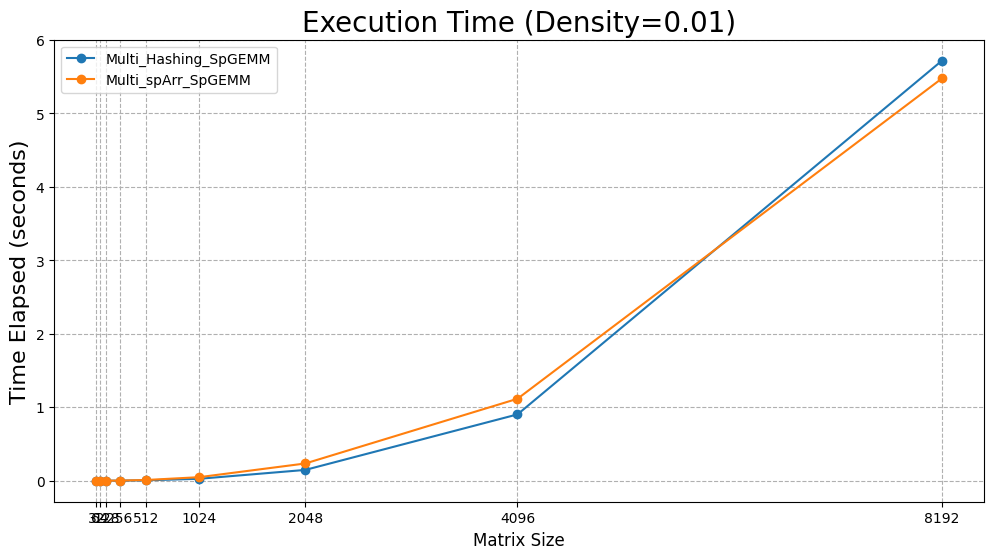

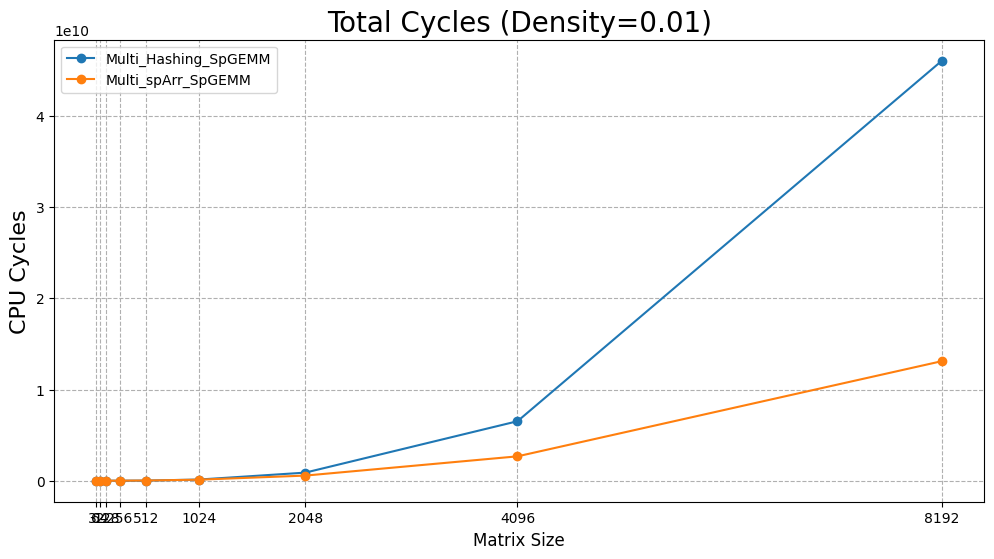

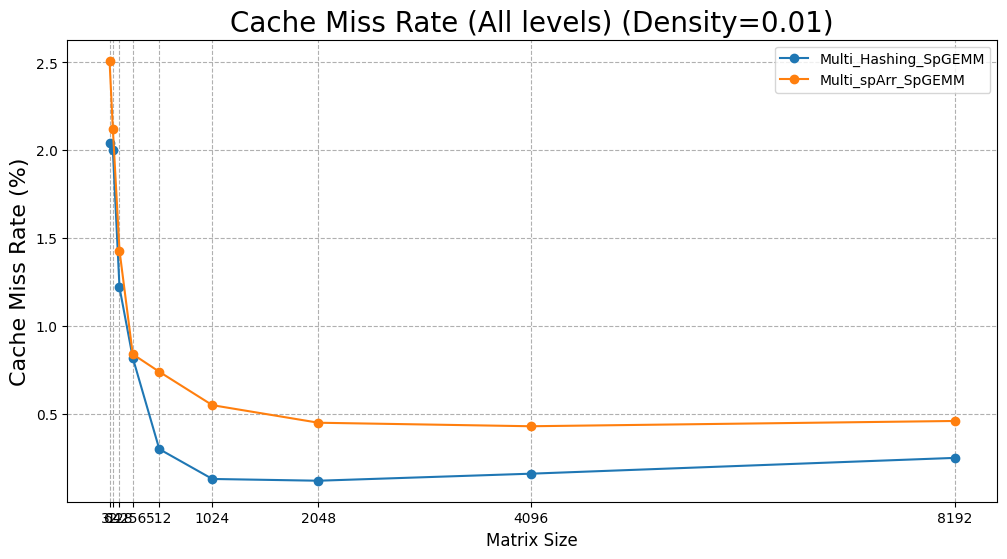

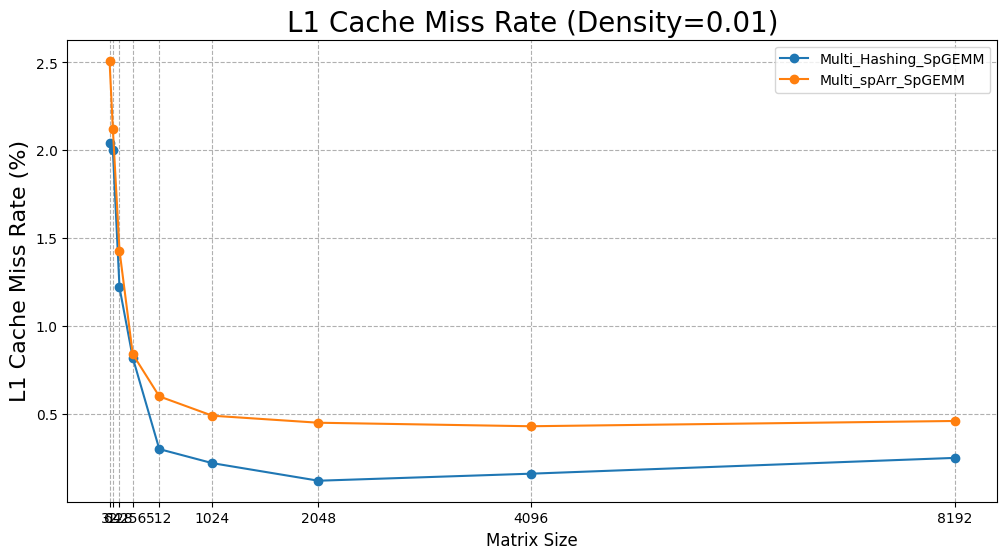

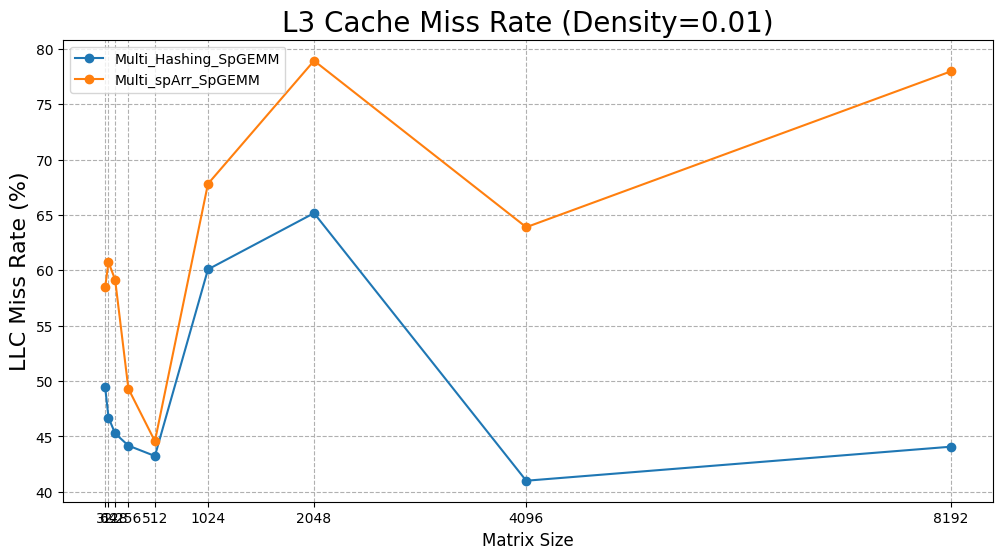

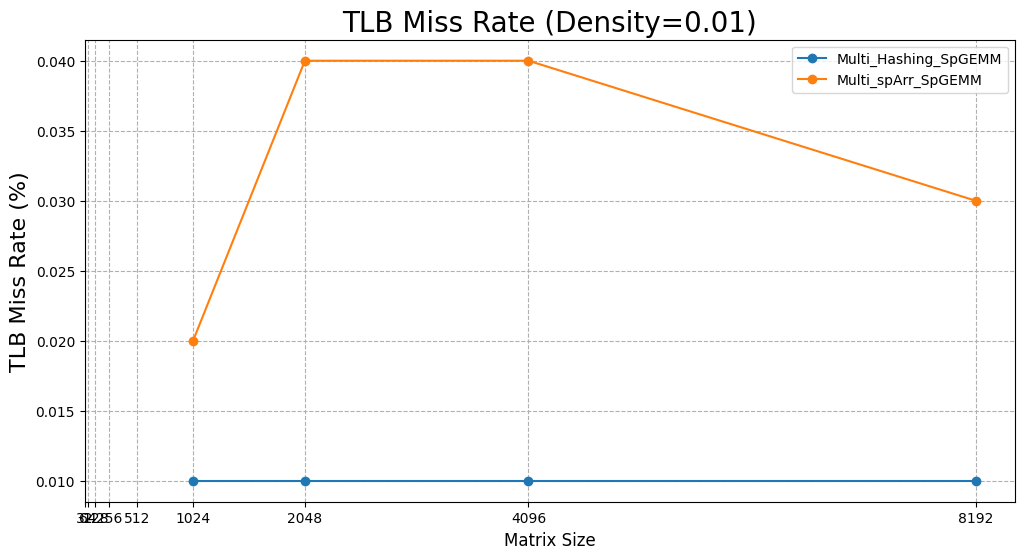

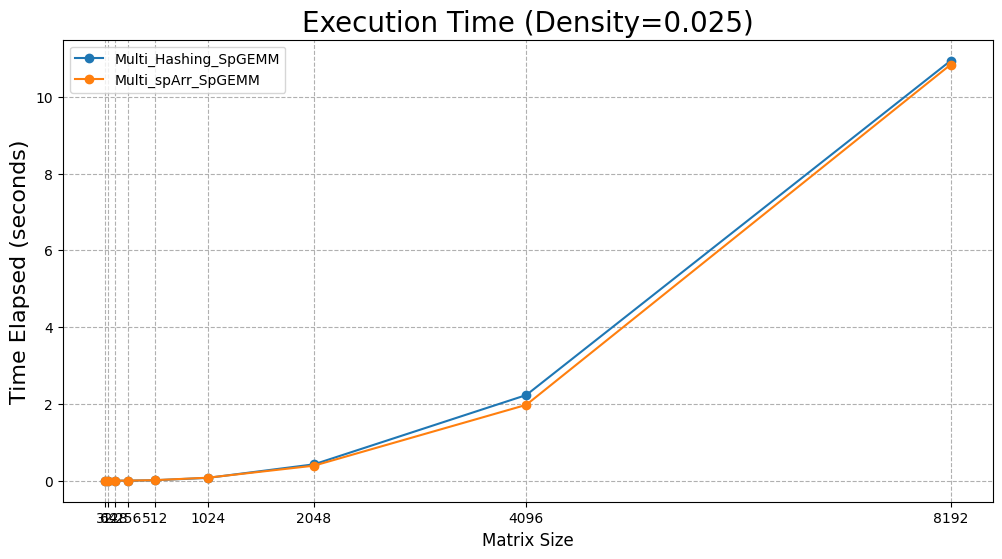

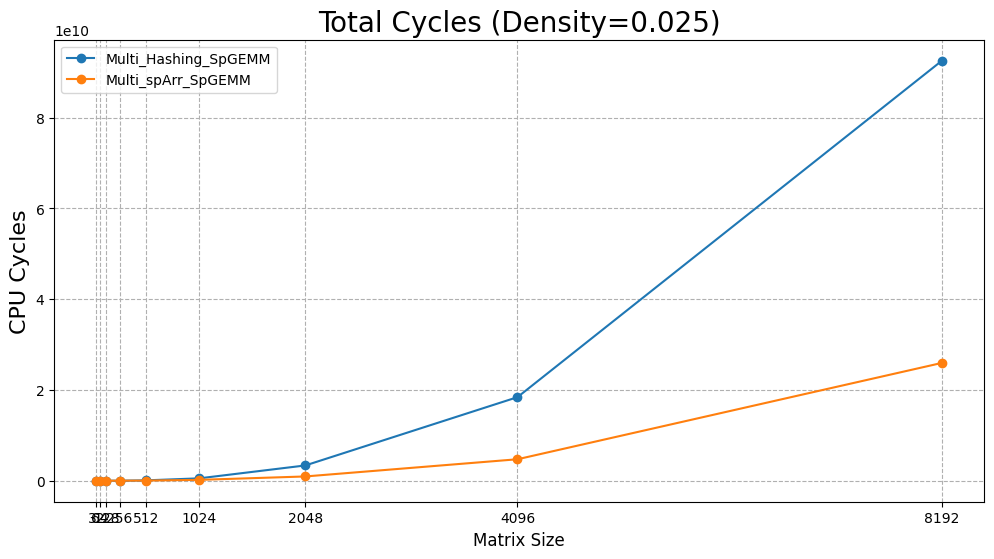

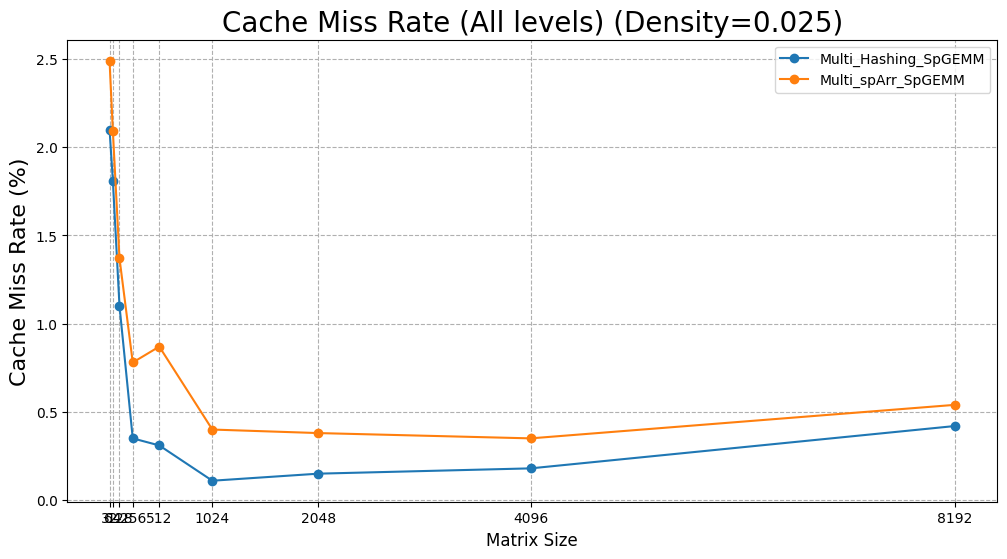

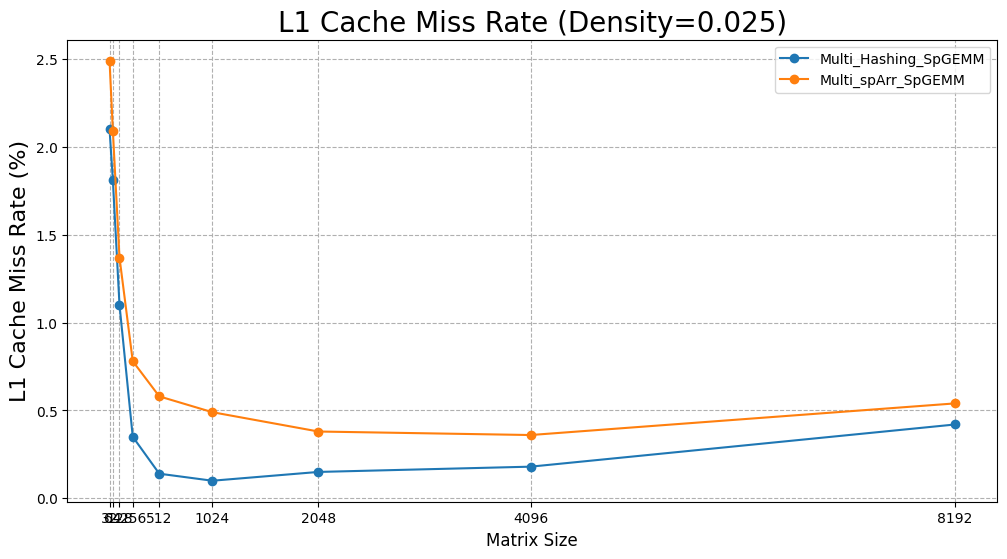

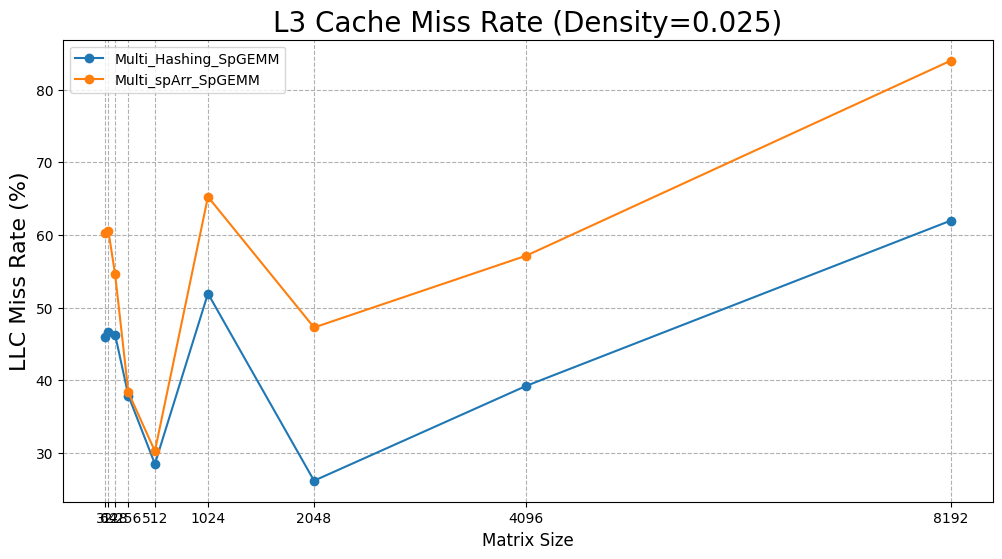

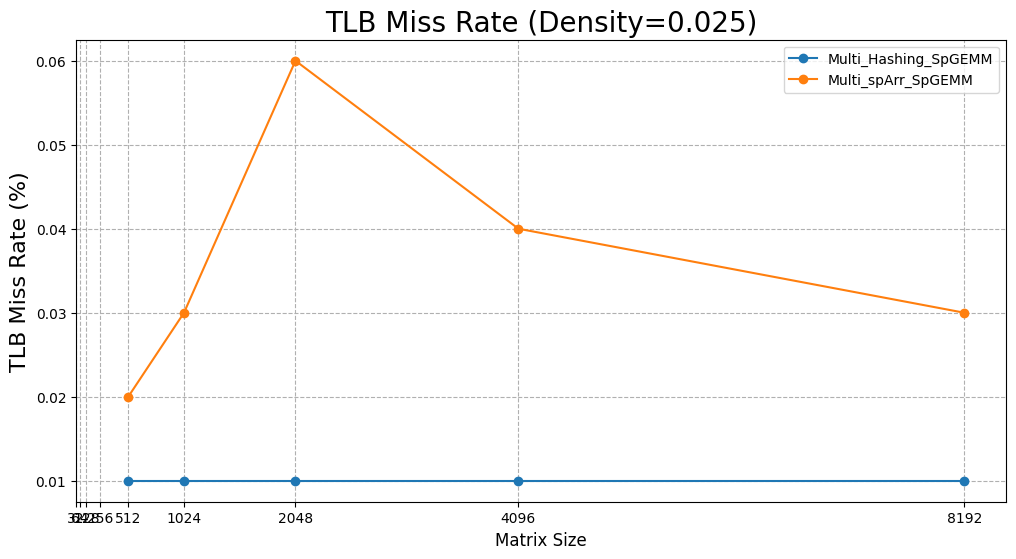

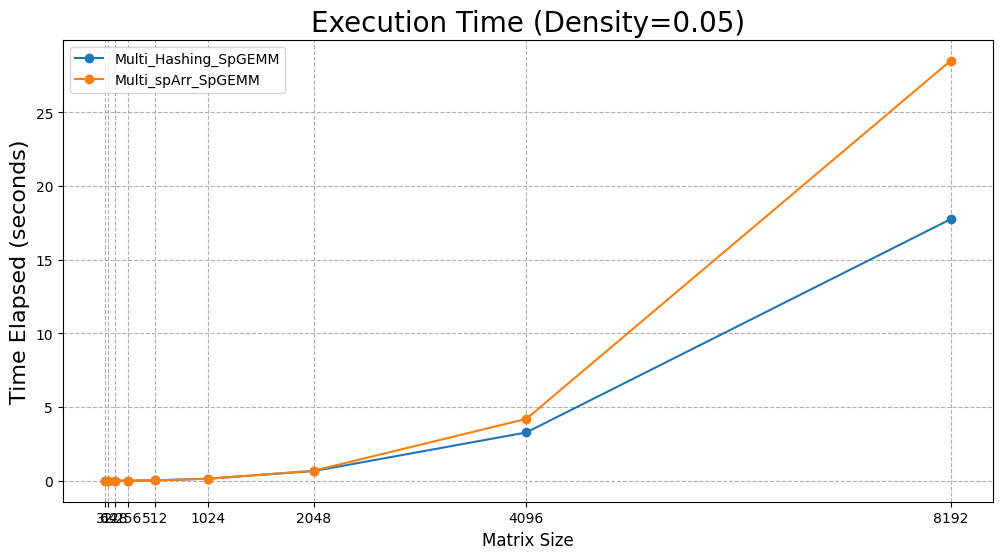

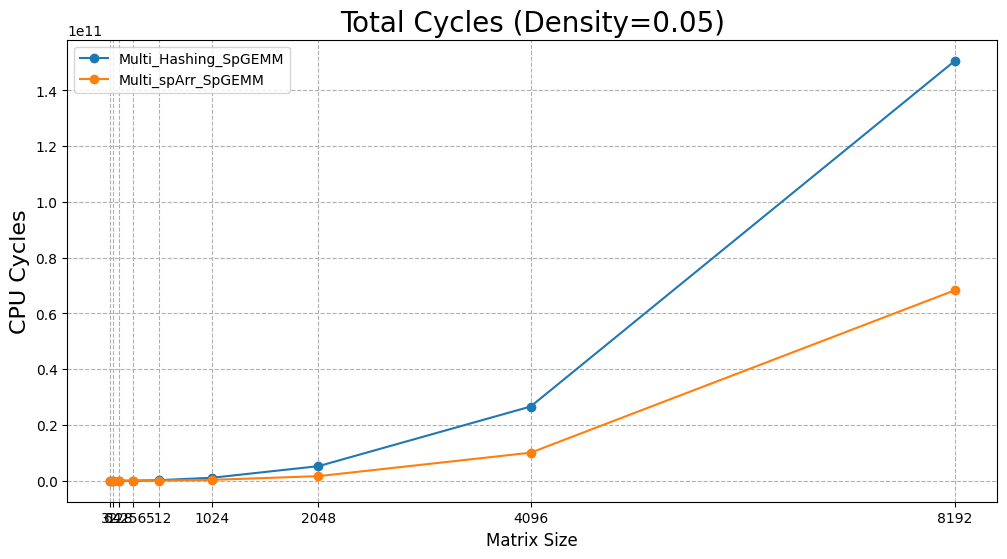

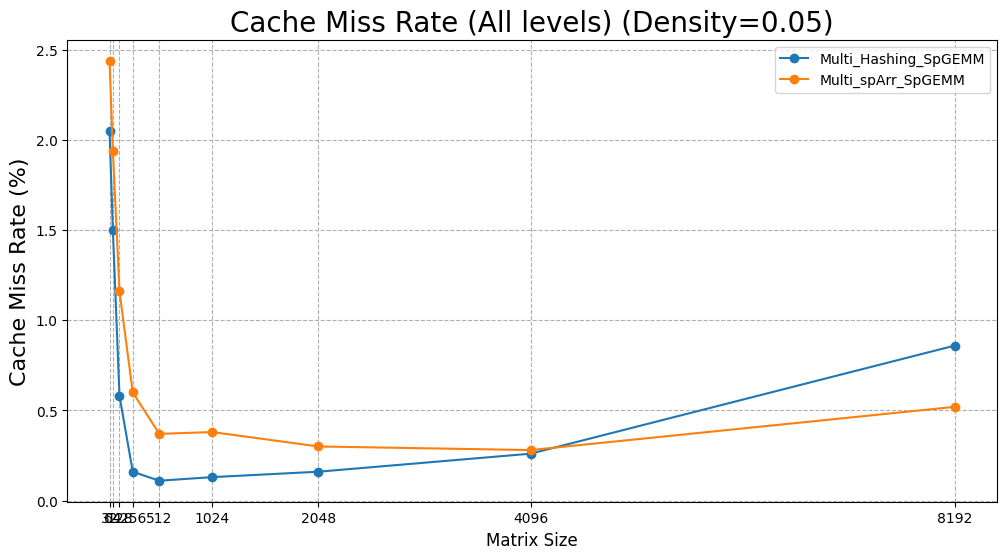

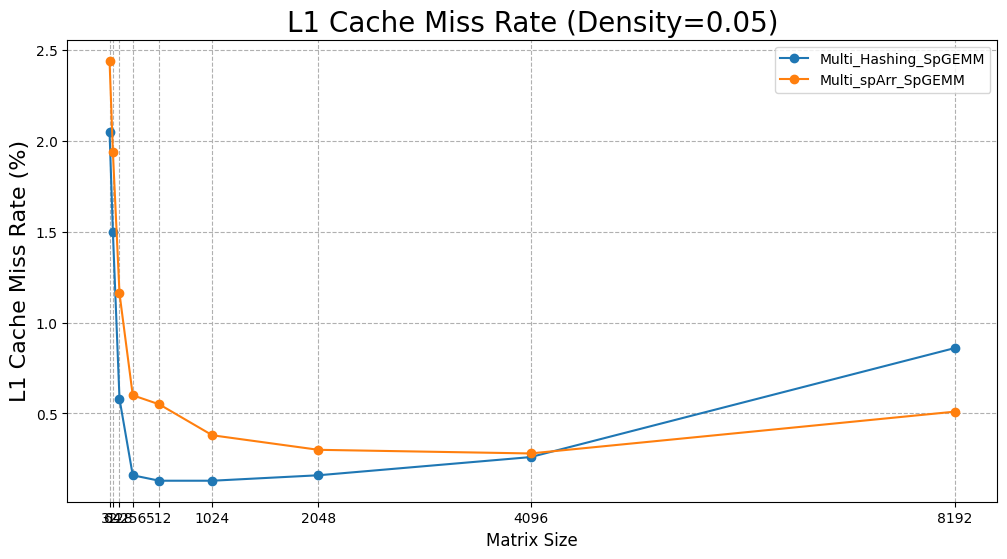

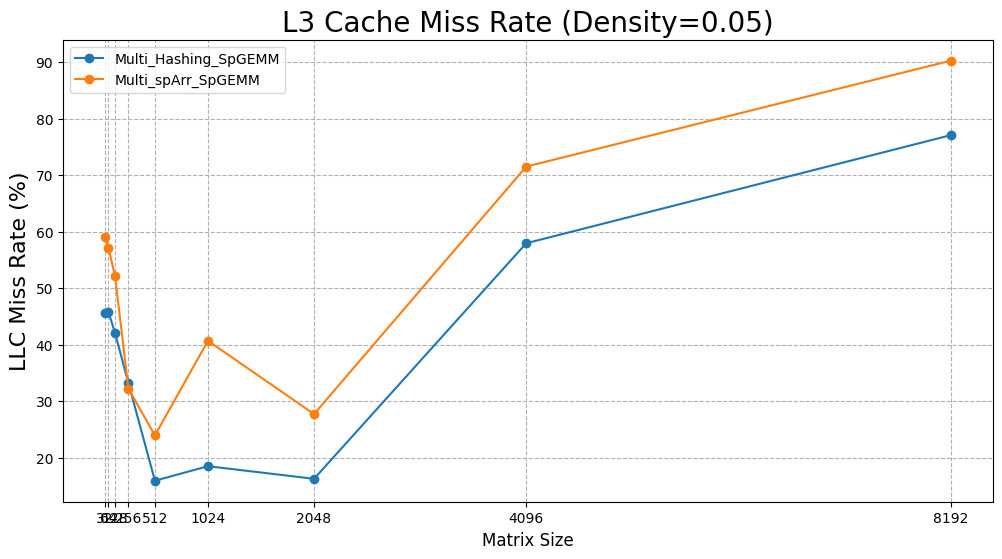

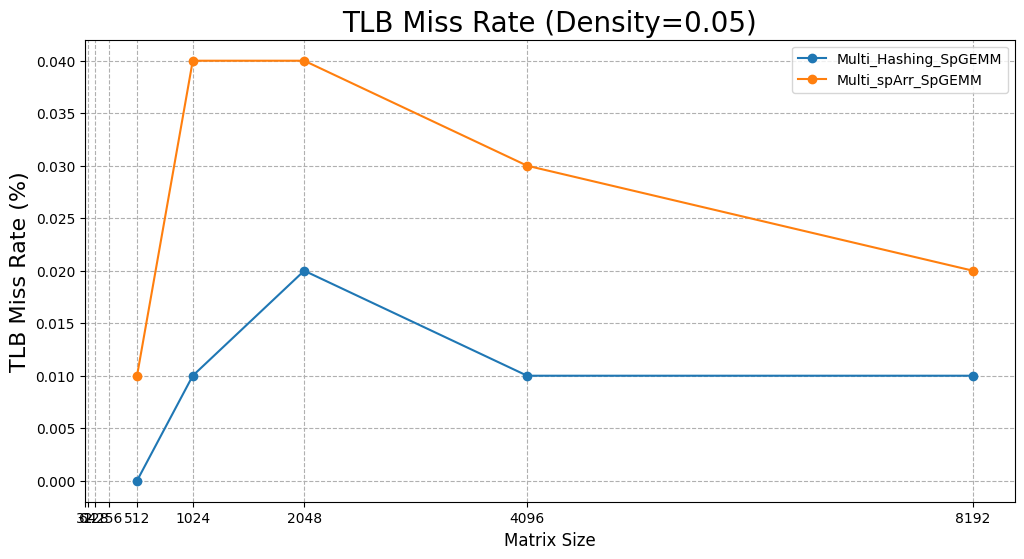

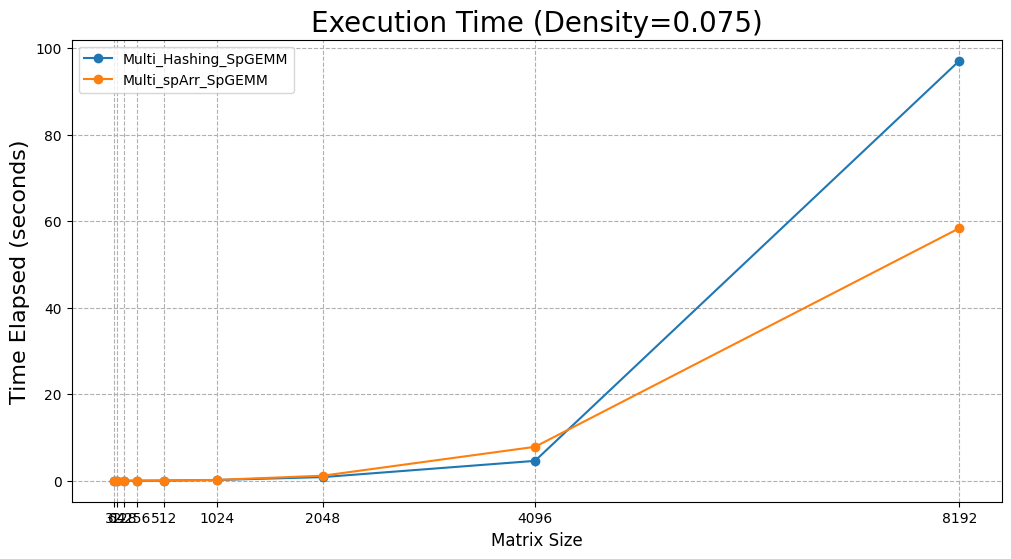

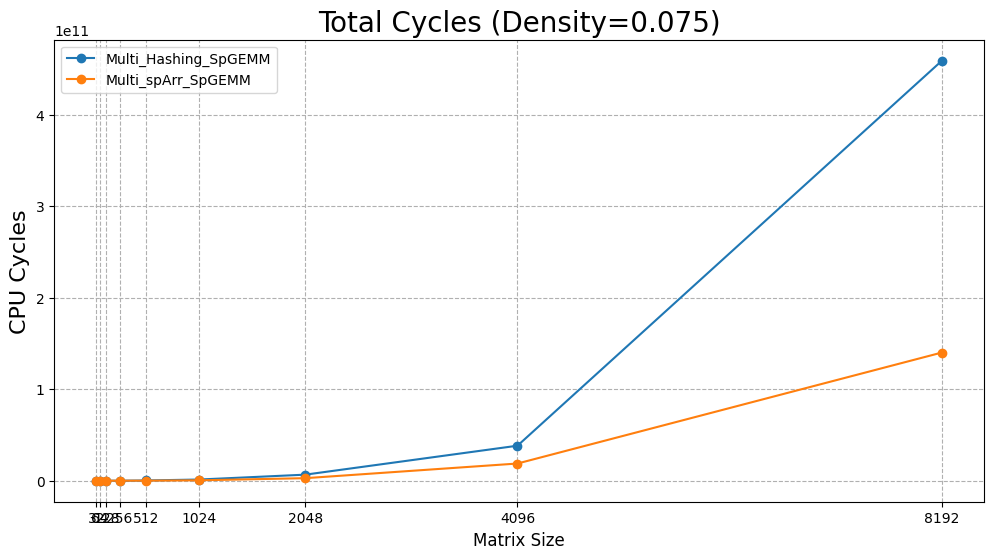

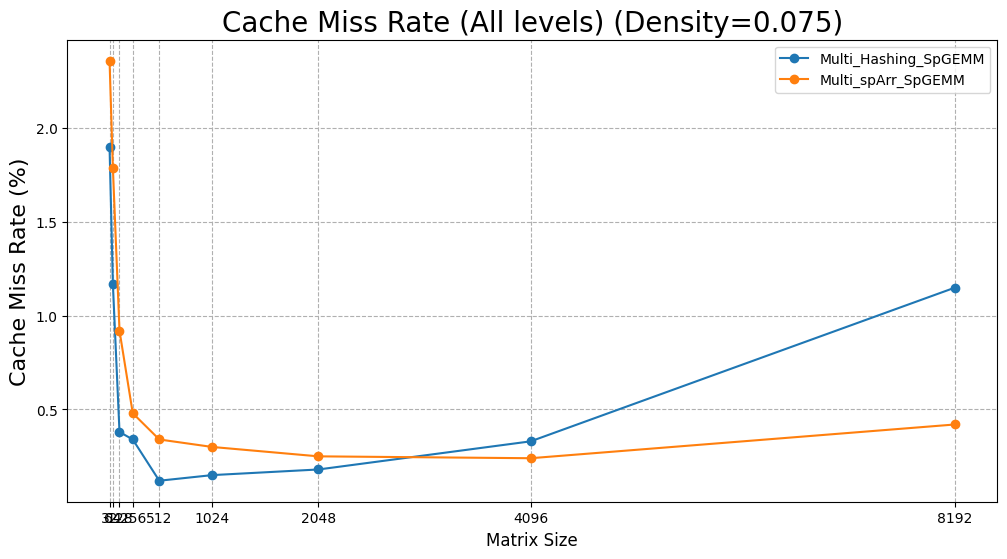

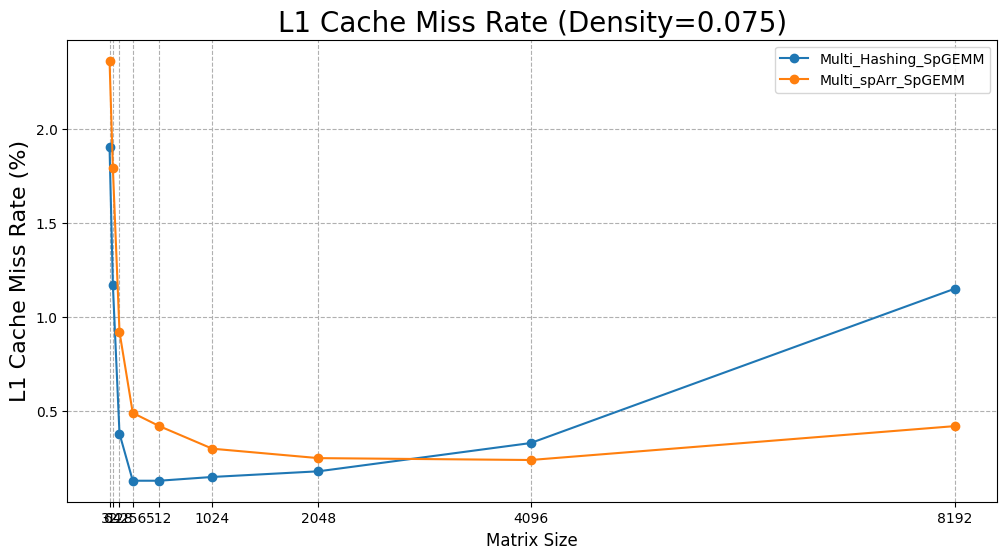

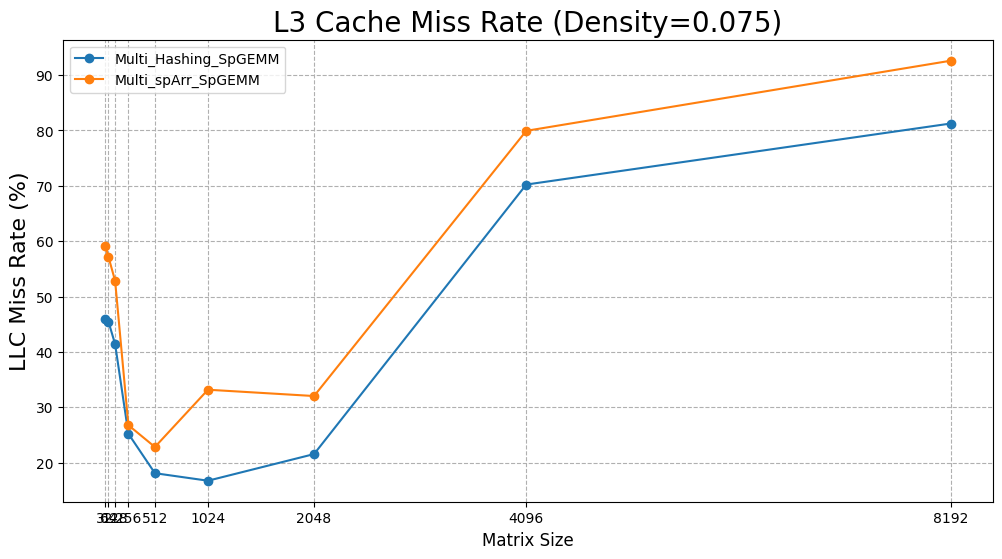

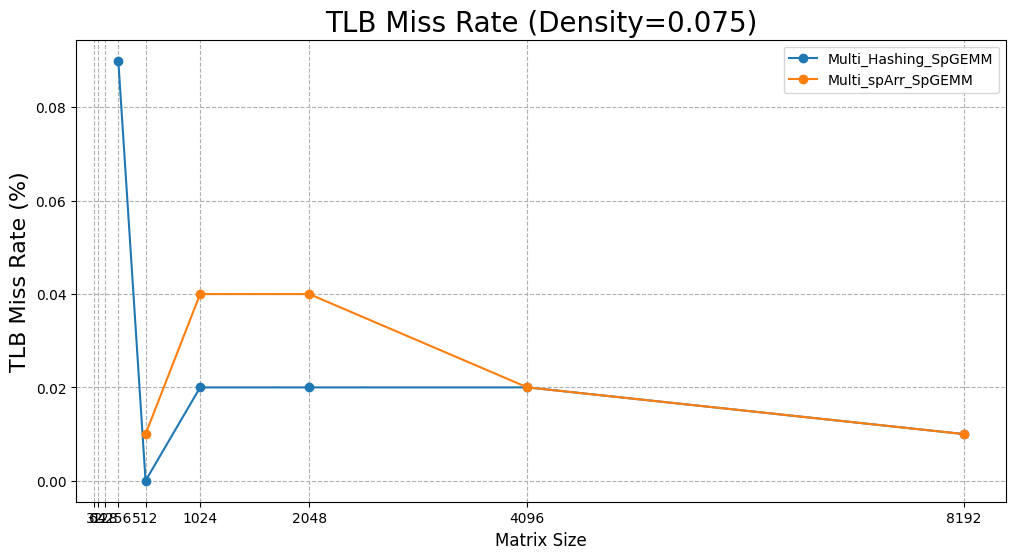

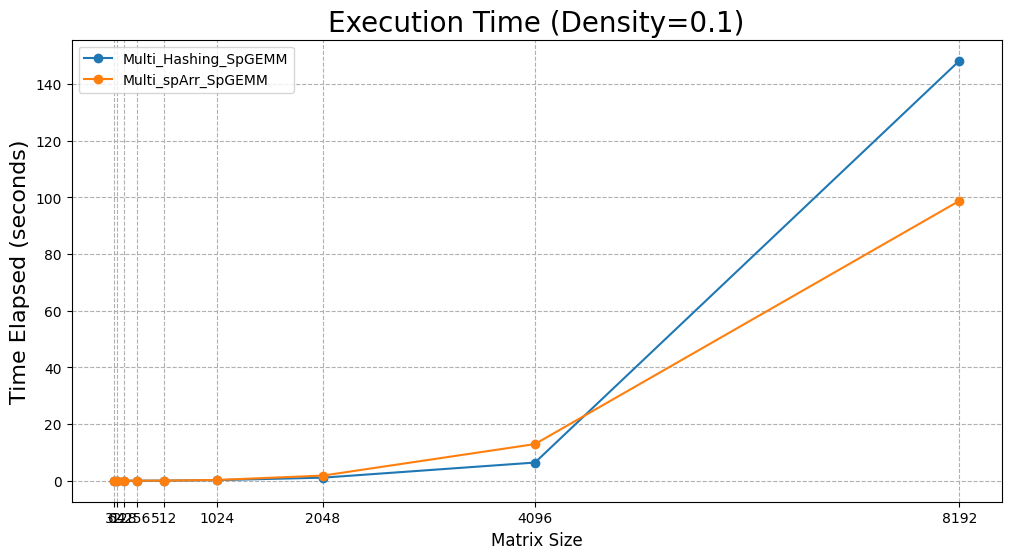

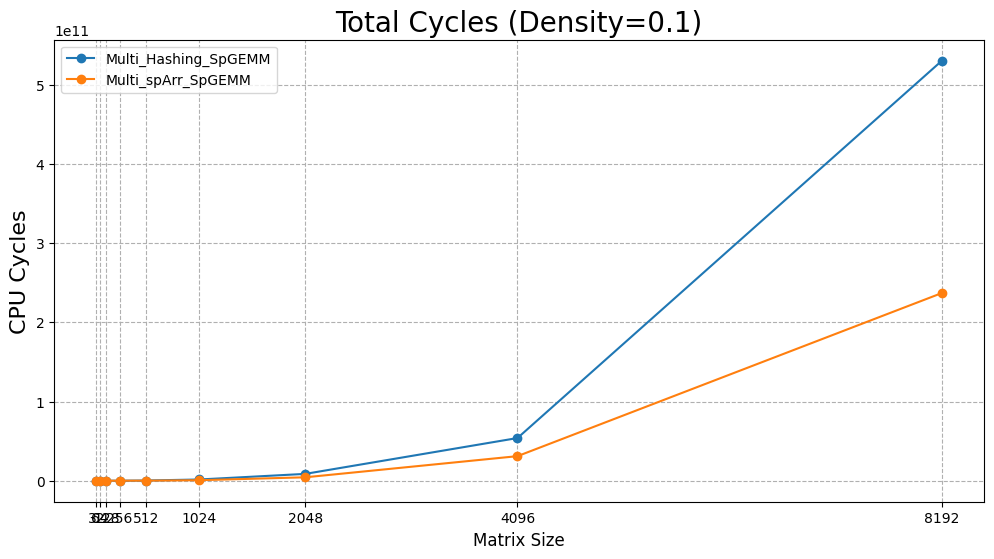

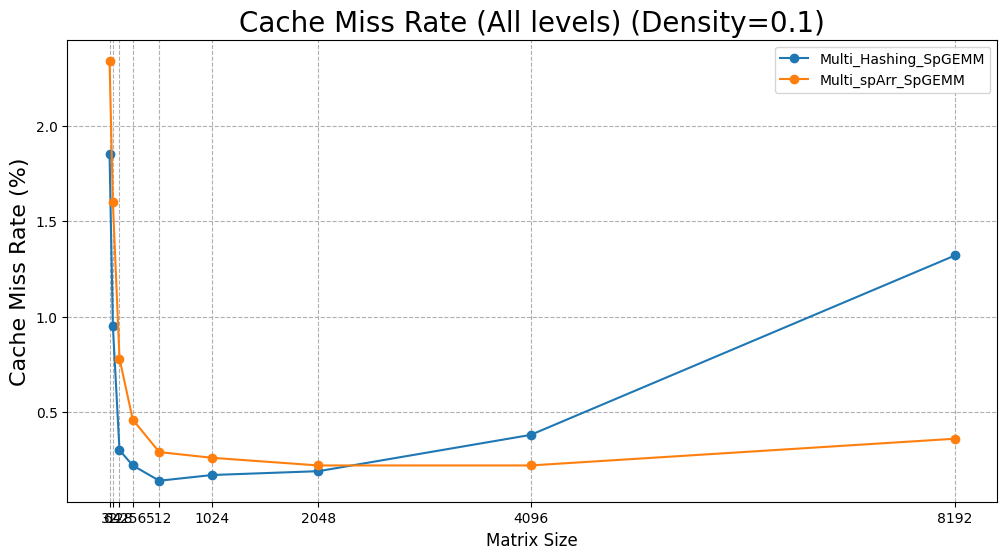

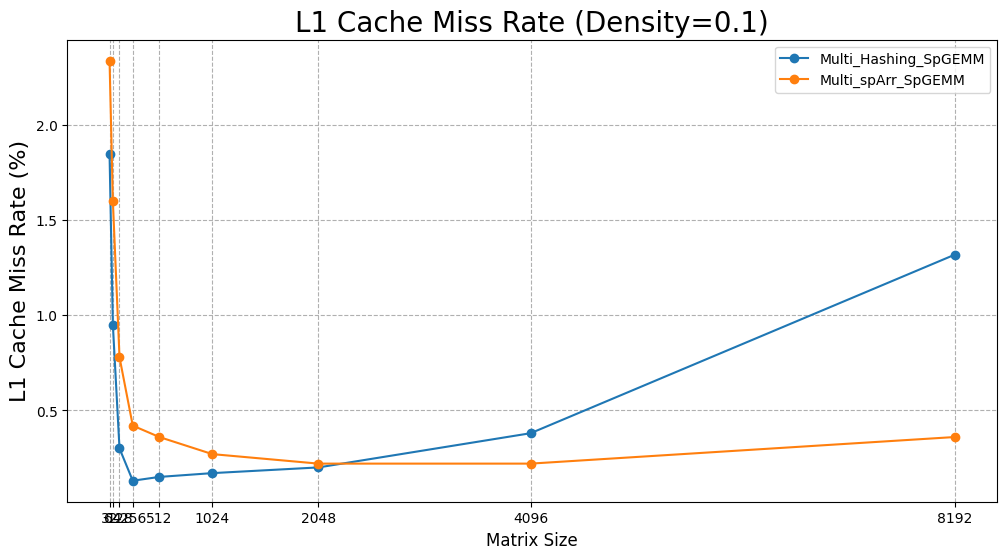

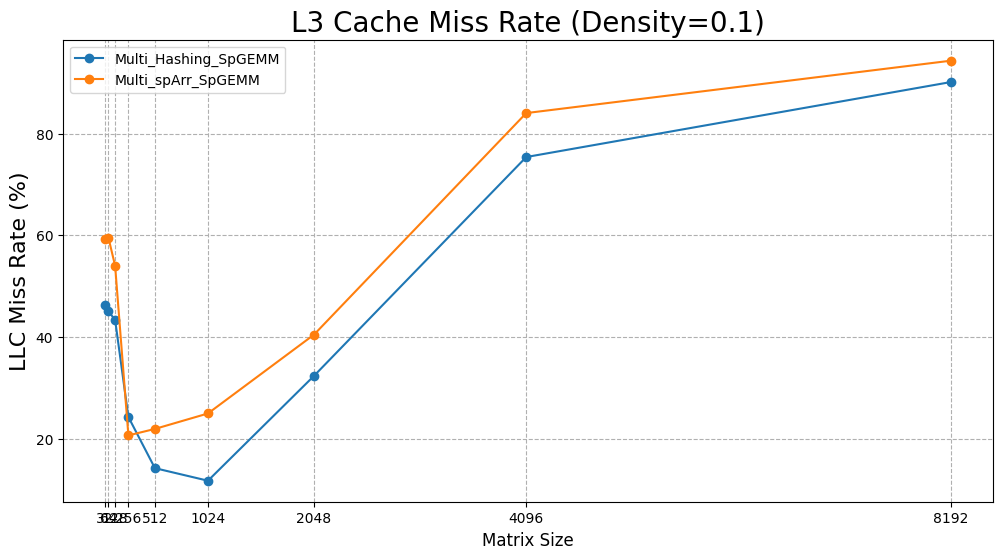

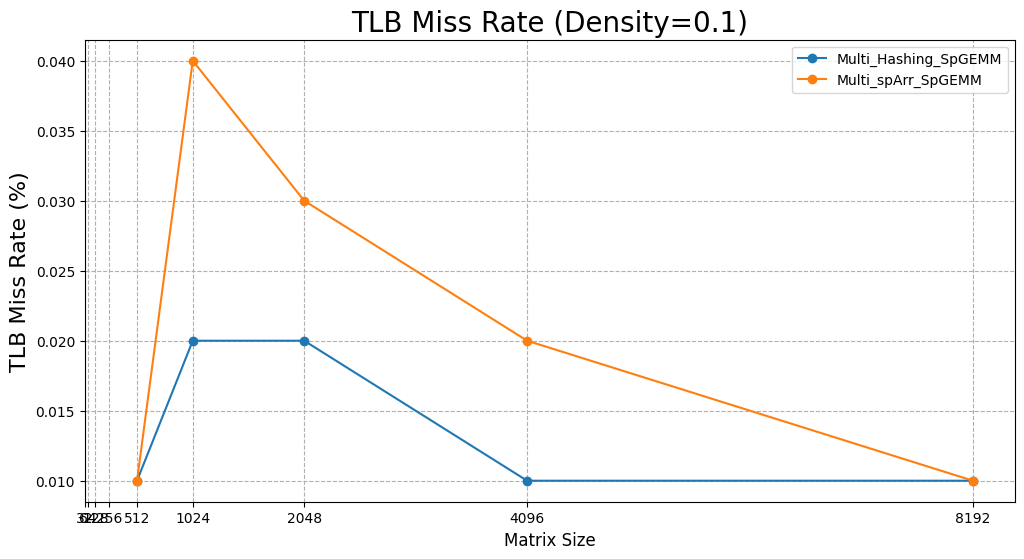

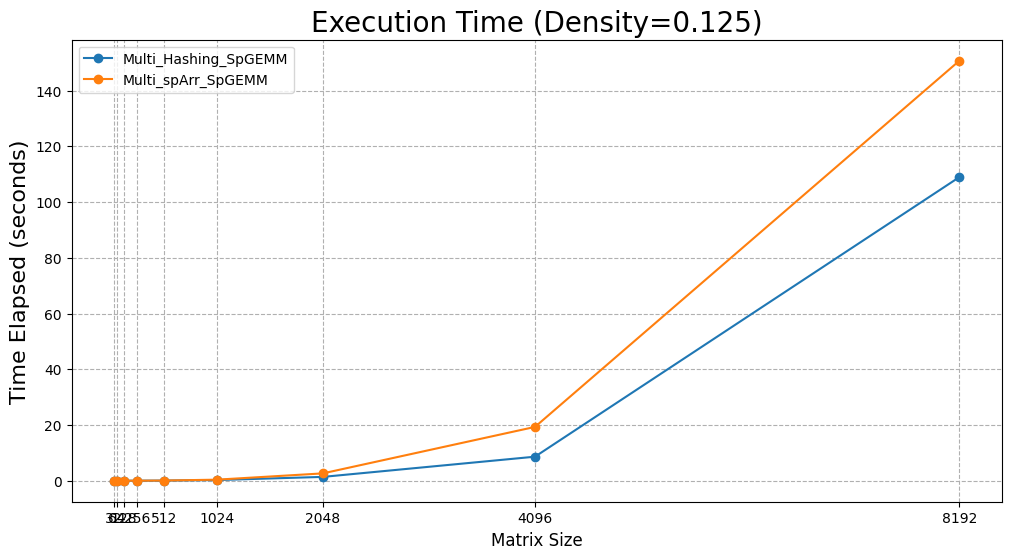

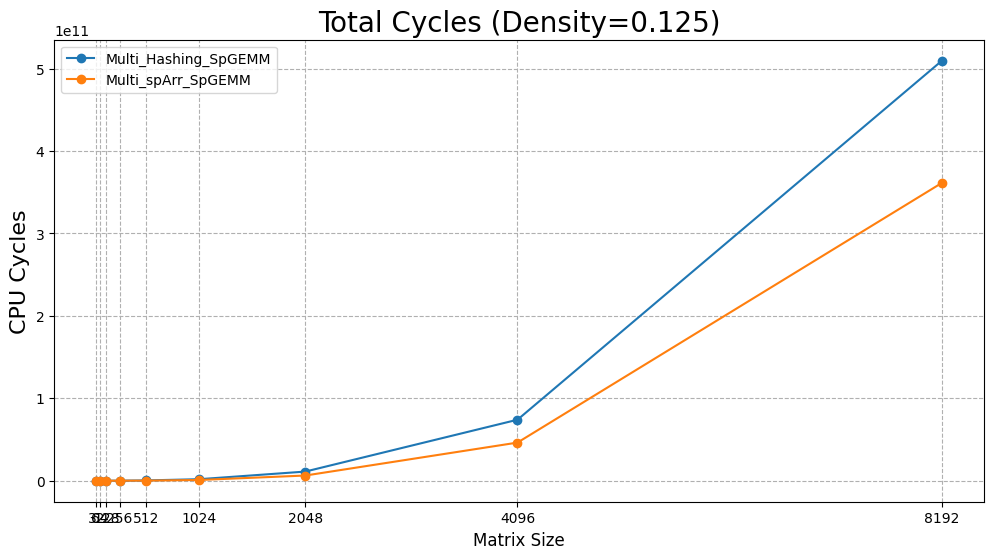

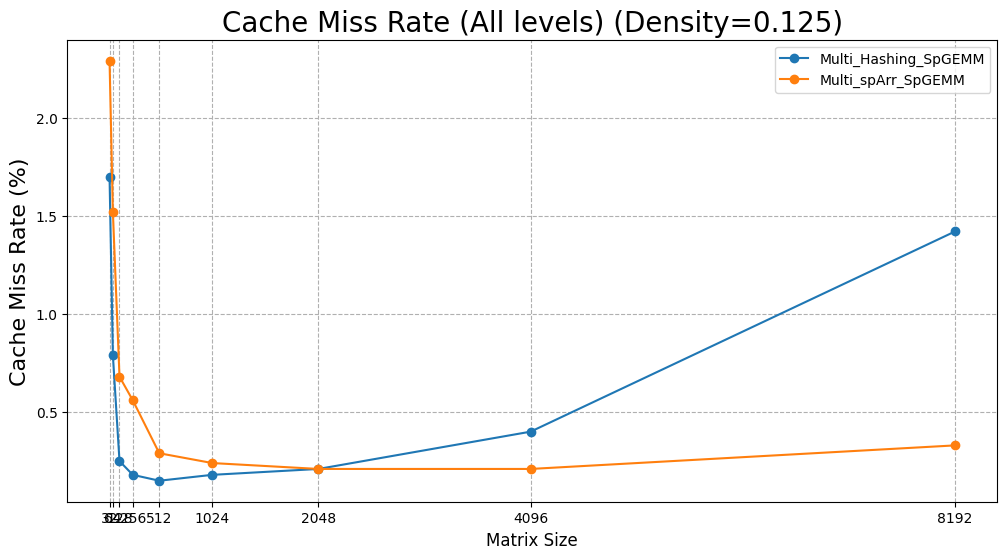

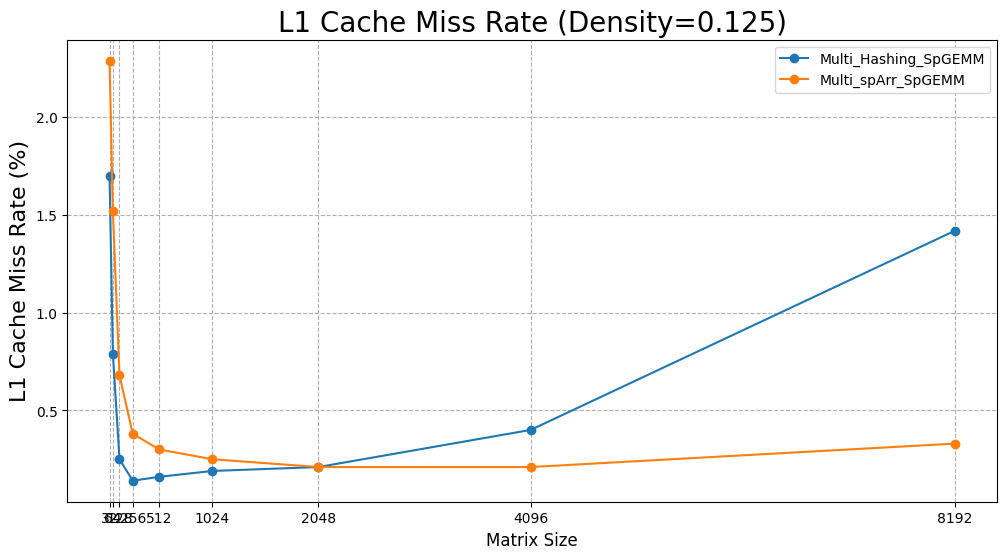

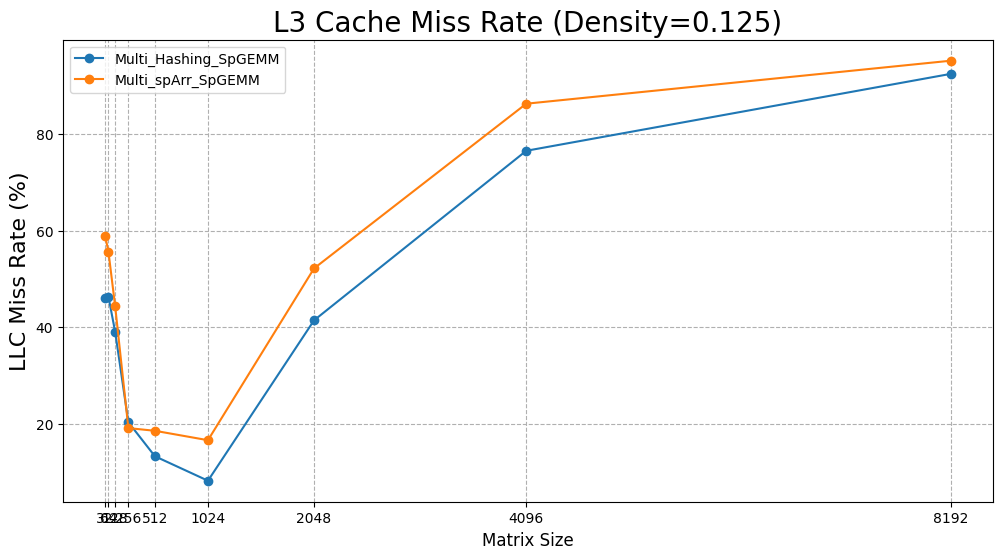

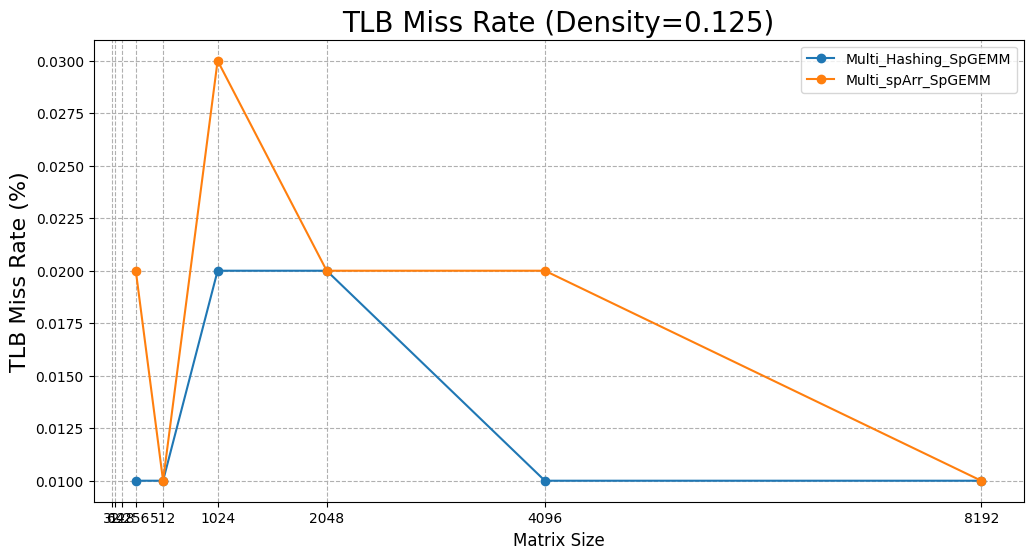

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义要读取的文件路径
file_path = '/Users/edlin/Desktop/Courses/UoE_Sem2/Dissertation/exp_data/perf_data_0716.txt'

# 读取数据
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_entry = {}
    for line in lines:
        if 'O(n^3)' in line or 'Single_SpGEMM' in line or 'Multi_Hashing_SpGEMM' in line or 'Multi_spArr_SpGEMM' in line:
            if current_entry:
                data.append(current_entry)
            parts = line.split()
            current_entry = {'method': parts[0], 'size': int(parts[1]), 'density': float(parts[2])}
        elif 'cycles' in line:
            current_entry['cycles'] = int(line.split()[0].replace(',', ''))
        elif 'cache-references' in line:
            current_entry['cache_references'] = int(line.split()[0].replace(',', ''))
        elif 'cache-misses' in line:
            current_entry['cache_misses'] = float(line.split()[3].strip('%'))  # cache miss rate
        elif 'L1-dcache-loads' in line:
            current_entry['l1_cache_loads'] = int(line.split()[0].replace(',', ''))
        elif 'L1-dcache-load-misses' in line:
            current_entry['l1_cache_misses'] = float(line.split()[3].strip('%'))  # L1 cache miss rate
        elif 'LLC-loads' in line:
            current_entry['llc_loads'] = int(line.split()[0].replace(',', ''))
        elif 'LLC-load-misses' in line:
            current_entry['llc_misses'] = float(line.split()[3].strip('%'))  # LLC miss rate
        elif 'TLB-loads' in line:
            current_entry['tlb_loads'] = int(line.split()[0].replace(',', ''))
        elif 'TLB-load-misses' in line:
            current_entry['tlb_misses'] = float(line.split()[3].strip('%'))  # TLB miss rate
        elif 'seconds time elapsed' in line:
            current_entry['time_elapsed'] = float(line.split()[0])
    if current_entry:
        data.append(current_entry)

# 转换为 DataFrame
df = pd.DataFrame(data)

# 定义绘图函数
def plot_data(df, metric, density, include_on3=True):
    plt.figure(figsize=(12, 6))
    methods = df['method'].unique()
    if not include_on3:
        methods = [method for method in methods if method != 'O(n^3)']
    
    for method in methods:
        subset = df[(df['method'] == method) & (df['density'] == density)]
        plt.plot(subset['size'], subset[metric], marker='o', label=method)  # 在数据点上标上圆点
    
    plt.xlabel('Matrix Size', fontsize=12)
    
    # 添加适当的 y 轴标签和单位
    if metric == 'time_elapsed':
        plt.ylabel('Time Elapsed (seconds)', fontsize=16)
        plt.title(f'Execution Time (Density={density})', fontsize=20)
    elif metric == 'cycles':
        plt.ylabel('CPU Cycles', fontsize=16)
        plt.title(f'Total Cycles (Density={density})', fontsize=20)
    elif metric == 'cache_misses':
        plt.ylabel('Cache Miss Rate (%)', fontsize=16)
        plt.title(f'Cache Miss Rate (All levels) (Density={density})', fontsize=20)
    elif metric == 'l1_cache_misses':
        plt.ylabel('L1 Cache Miss Rate (%)', fontsize=16)
        plt.title(f'L1 Cache Miss Rate (Density={density})', fontsize=20)
    elif metric == 'llc_misses':
        plt.ylabel('LLC Miss Rate (%)', fontsize=16)
        plt.title(f'L3 Cache Miss Rate (Density={density})', fontsize=20)
    elif metric == 'tlb_misses':
        plt.ylabel('TLB Miss Rate (%)', fontsize=16)
        plt.title(f'TLB Miss Rate (Density={density})', fontsize=20)
    else:
        plt.ylabel(metric.replace('_', ' ').title())
    
    # 设置适当的图表标题
    title_metric = metric.replace('_', ' ').title()
    # plt.title(f'{title_metric} vs Matrix Size (Density={density})')
    plt.legend()
    plt.grid(True, which="both", ls="--")  # 显示主要和次要网格线
    
    # 设置 x 轴为对数刻度，并保持同样间隔
    # plt.xscale('log')
    # plt.yscale('log')
    x_ticks = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    plt.xticks(x_ticks, labels=[str(tick) for tick in x_ticks])
    
    plt.show()

# 绘制图表
metrics = ['time_elapsed', 'cycles', 'cache_misses', 'l1_cache_misses', 'llc_misses', 'tlb_misses']
densities = [0.01, 0.025, 0.05, 0.075, 0.10, 0.125]

include_on3 = True  # 设置是否包含 O(n^3)
for density in densities:
    for metric in metrics:
        plot_data(df, metric, density, include_on3)


In [33]:
df

,method,size,density,cycles,cache_references,cache_misses,l1_cache_loads,l1_cache_misses,llc_loads,llc_misses,time_elapsed,tlb_loads,tlb_misses
0,Multi_Hashing_SpGEMM,32,0.010,4555809,1502083,2.04,1502083,2.04,56893,49.44,0.001618,NaN,NaN
1,Multi_spArr_SpGEMM,32,0.010,2726072,940845,2.51,940845,2.51,35830,58.47,0.001355,NaN,NaN
2,Multi_Hashing_SpGEMM,64,0.010,3628591,1619044,2.00,1619044,2.00,61597,46.70,0.001738,NaN,NaN
3,Multi_spArr_SpGEMM,64,0.010,2884876,1164569,2.12,1164569,2.12,35899,60.73,0.001414,NaN,NaN
4,Multi_Hashing_SpGEMM,128,0.010,6078053,2857609,1.22,2857609,1.22,64947,45.27,0.002032,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Multi_spArr_SpGEMM,2048,0.125,6307161896,7010656719,0.21,6989113598,0.21,35756250,52.19,2.631624,7.001206e+09,0.02
104,Multi_Hashing_SpGEMM,4096,0.125,74009177608,75101310861,0.40,75111790239,0.40,378857156,76.57,8.625168,7.509534e+10,0.01
105,Multi_spArr_SpGEMM,4096,0.125,46268421084,53217439679,0.21,53203751116,0.21,211473892,86.33,19.310366,5.318606e+10,0.02
106,Multi_Hashing_SpGEMM,8192,0.125,509548553921,528181773517,1.42,528189849250,1.42,2320953177,92.51,108.939238,5.282043e+11,0.01
